<a href="https://colab.research.google.com/github/shaloy-lewis/Netflix_movies_and_tv_shows_clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Shaloy_Lewis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Netflix Movies and TV Shows Clustering </u></b>

## <b> Problem Description </b>

* This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
* In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

## <b> Attribute Information </b>
1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genre

12. description: The Summary description

# **Importing the libraries and the dataset:**

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# reading data
path = '/content/drive/MyDrive/Netflix movies and TV shows clustering - Shaloy Lewis/Netflix_movies_and_tv_shows_clustering.csv'

original_df = pd.read_csv(path,index_col='show_id')
df = original_df.copy()

In [4]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.shape

(7787, 11)

In [6]:
df.nunique()

type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

The dataset contains 7787 records and 11 attributes.

# **Cleaning data:**

**1. Checking for duplicate records:**

In [7]:
# Checking for duplicate records
df.duplicated().value_counts()

False    7787
dtype: int64

There are no duplicated records in the dataset.

**2. Checking for missing values and handling them:**

In [8]:
# Missing values in the dataset
df.isna().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
# Checking the unique values in each attribute of the dataset
df.nunique()

type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

* The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
* 10 records with missing values in the date_added column can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [10]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [11]:
# Missing values
df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
df.shape

(7777, 11)

We have successfully handled all the missing values in the dataset.

**3. Country, listed_in:**

In [13]:
# Top countries
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [14]:
# Genre of shows
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

* There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
* To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
* Also, let's consider only the primary genre of the respective movie / TV show.

In [15]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [16]:
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [17]:
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

**4. Converting the datatype of duration column to integer**

In [18]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [19]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [20]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [21]:
# datatype of duration
df.duration.dtype

dtype('int64')

We have successfully converted the datatype of duration column to int.

**5. converting date_added to datetime datatype:**

In [22]:
# Converting the datatype of date_added column to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

In [23]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [24]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

**6. Rating:**

The ratings can be changed to age restrictions that apply on certain movies and TV shows.

[Reference](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)

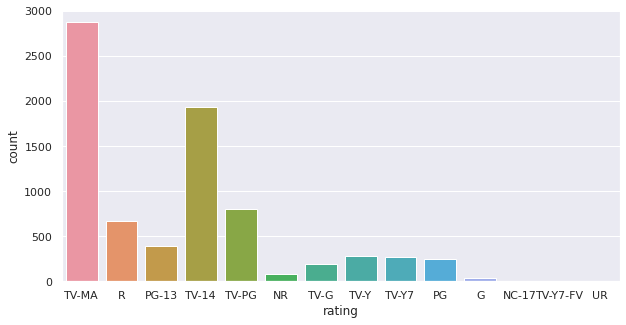

In [25]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

In [26]:
# Age ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [27]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

This step is done to improve the interpretability.

# **Exploratory Data Analysis:**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, s1 to s7787
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7777 non-null   object
 1   title         7777 non-null   object
 2   director      7777 non-null   object
 3   cast          7777 non-null   object
 4   country       7777 non-null   object
 5   release_year  7777 non-null   int64 
 6   rating        7777 non-null   object
 7   duration      7777 non-null   int64 
 8   listed_in     7777 non-null   object
 9   description   7777 non-null   object
 10  month_added   7777 non-null   int64 
 11  year_added    7777 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 1.0+ MB


**1. Univatiate Analysis:**

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

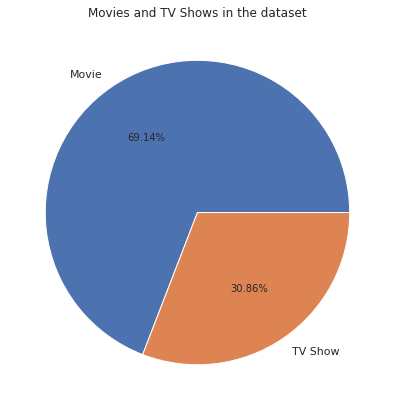

In [29]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

There are more movies (69.14%) than TV shows (30.86%)  in the dataset.

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

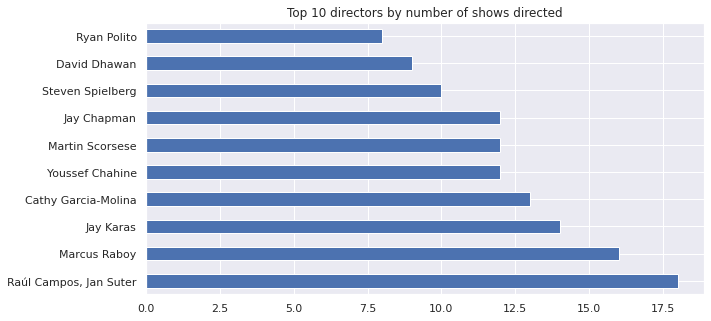

In [30]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

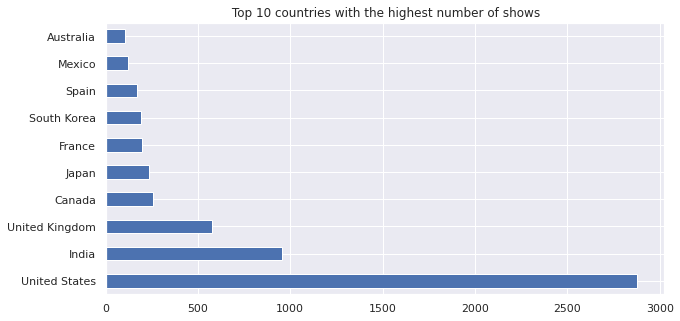

In [31]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

The highest number of movies / TV shows were based out of the US, followed by India and UK.

In [32]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [33]:
# % share of movies / tv shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

* The top 3 countries together account for about 56% of all movies and TV shows in the dataset.
* This value increases to about 78% for top ten countries.

Text(0.5, 1.0, 'distribution by released year')

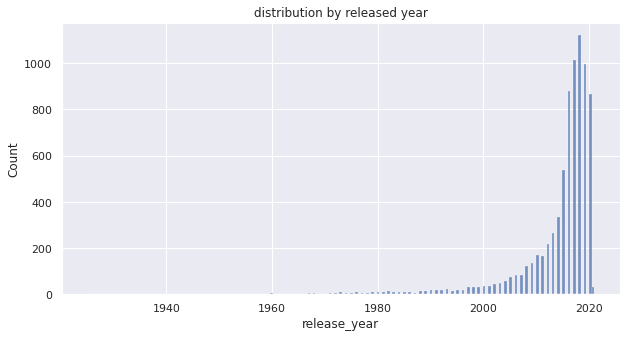

In [34]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

Netflix has greater number of new movies / TV shows than the old ones.

Text(0.5, 1.0, 'Top 10 genres')

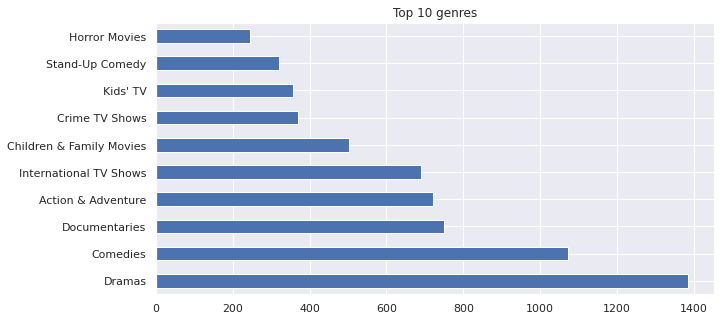

In [35]:
# Top 10 genres 
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [36]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [37]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

* The dramas is the most popular genre followed by comedies and documentaries.
* These three genres account for about 41% of all movies and TV shows.
* This value increases to about 82% for top 10 genres.

Text(0.5, 0, '')

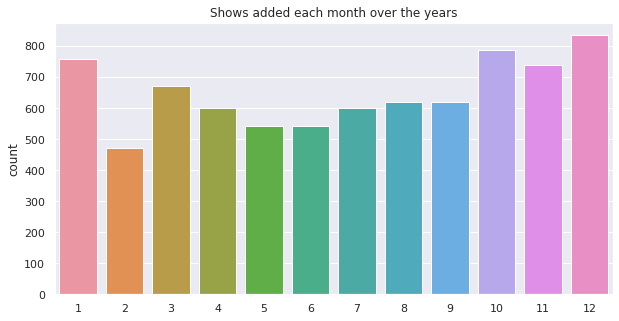

In [38]:
# Number of shows added on different months
plt.figure(figsize = (10,5)) 
sns.countplot(df['month_added'])
plt.title('Shows added each month over the years')
plt.xlabel('')

On average a greater number of shows are added in the months of October, November, December, and January.

Text(0.5, 0, '')

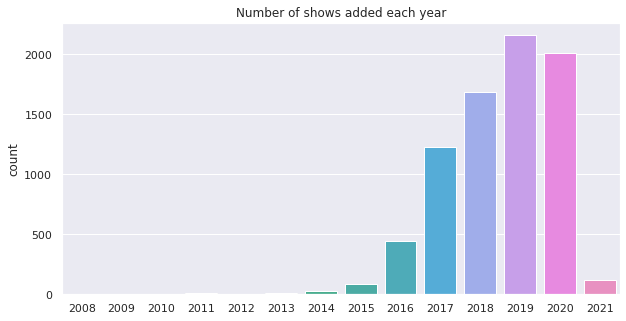

In [39]:
# Number of shows added over the years
plt.figure(figsize = (10,5)) 
sns.countplot(df['year_added'])
plt.title('Number of shows added each year')
plt.xlabel('')

* Netflix continuous to add more shows on its platform over the years.
* There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
* We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

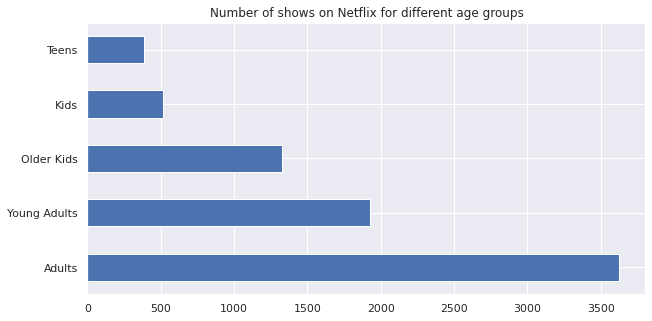

In [40]:
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

* The majority of the shows on Netflix are catered to the needs of adult and young adult population.

**2. Bivariate analysis:**

In [41]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
show_id,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11,2017
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1,2020


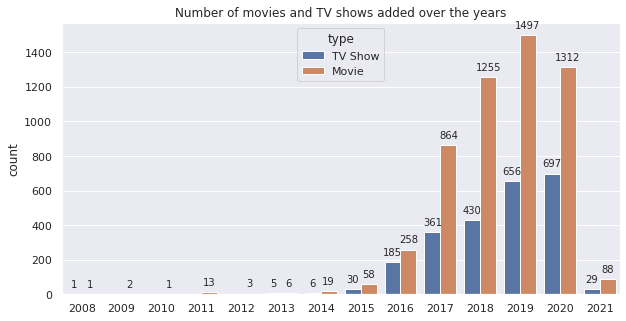

In [42]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

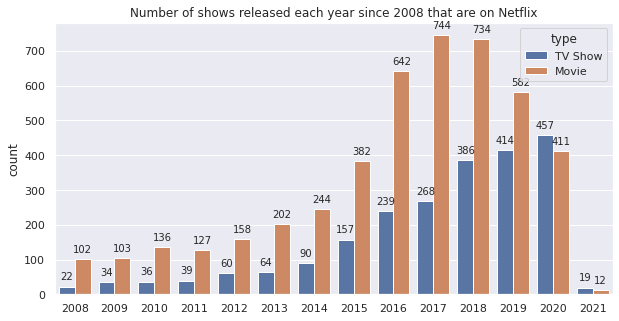

In [43]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* Over the years, Netflix has consistently focused on adding more shows in its platform.
* Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
* This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

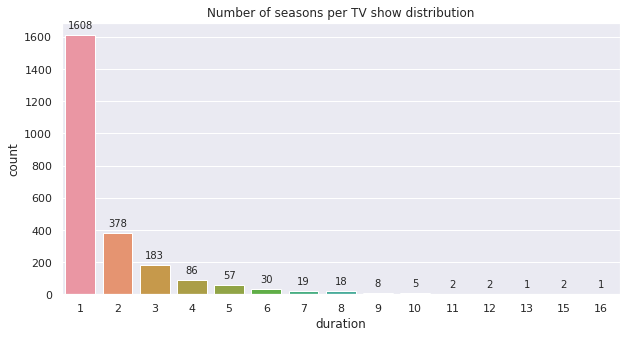

In [44]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [45]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

67.0

* The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.
* There are very few TV shows that have more than 8 seasons.

Text(0.5, 1.0, 'Movie duration distribution')

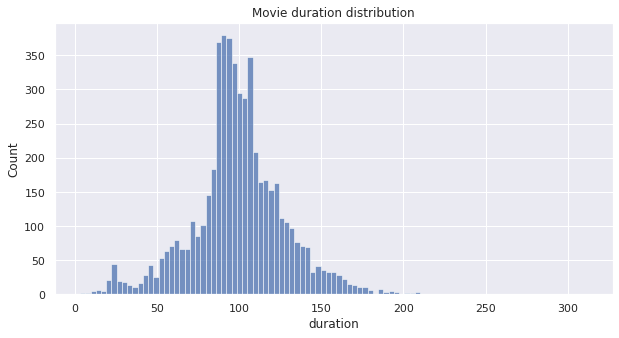

In [46]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [47]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

* The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

Text(0.5, 0, 'Year')

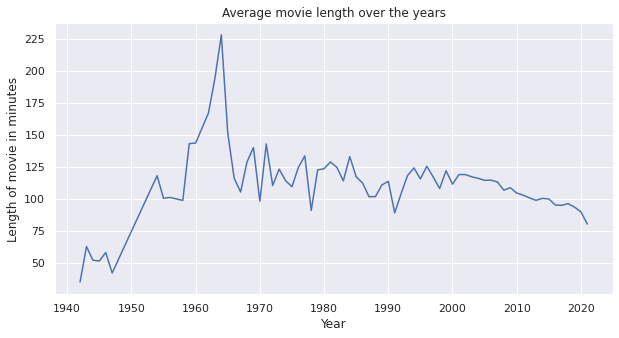

In [48]:
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

In [49]:
# Movie release year statistics
df[df['type']== 'Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

* Netflix has several movies on its site, including those that were released in way back 1942.
* As per the plot, movies made in the 1940s had a fairly short duration on average.
* On average, movies made in the 1960s have the longest movie length.
* The average length of a movie has been continuously decreasing since the 2000s.

Text(0.5, 1.0, 'Top 10 genres for movies')

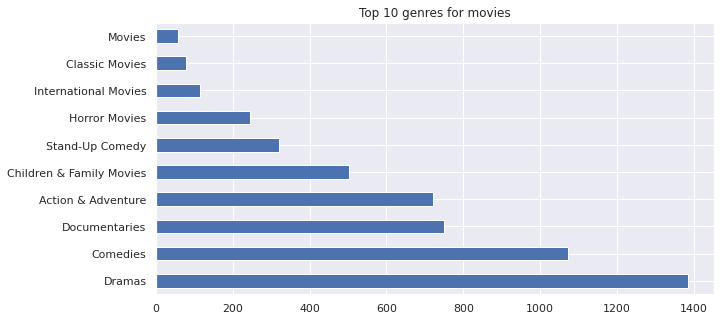

In [50]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

* Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

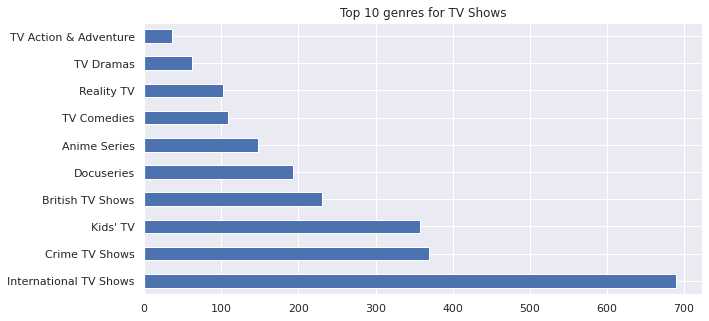

In [51]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

* International, crime, and kids are the most popular genre for TV shows on Netflix.

Text(0.5, 1.0, 'Top 10 movie directors')

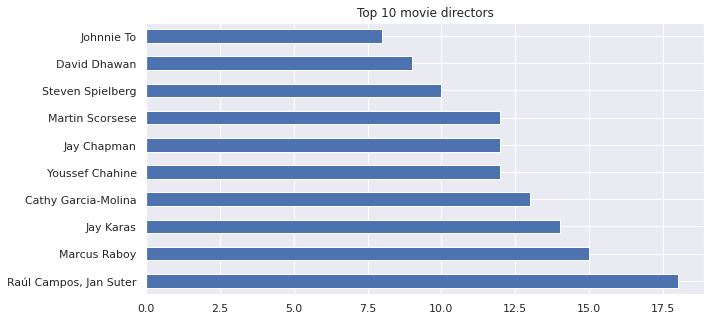

In [52]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

* Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.
* This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina

Text(0.5, 1.0, 'Top 10 TV show directors')

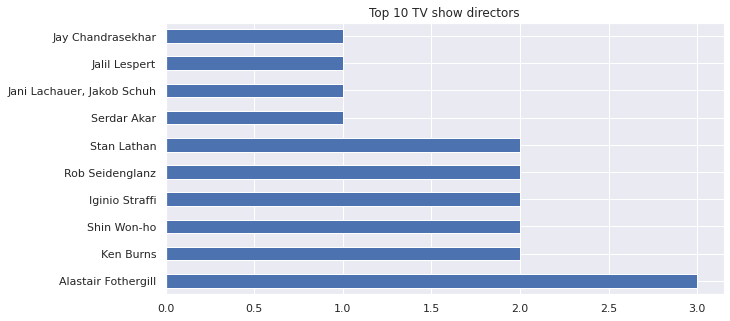

In [53]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

* Alastair Fothergill has directed three TV shows, the most of any director.
* Only six directors have directed more than one television show.

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

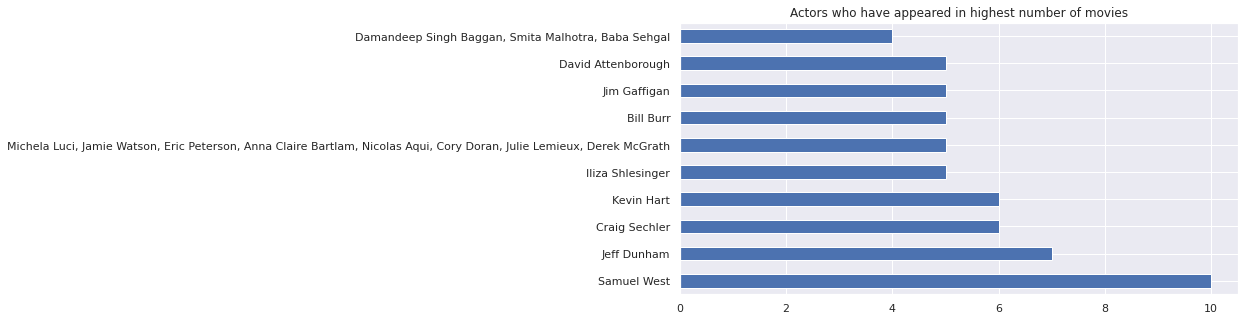

In [54]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

* Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

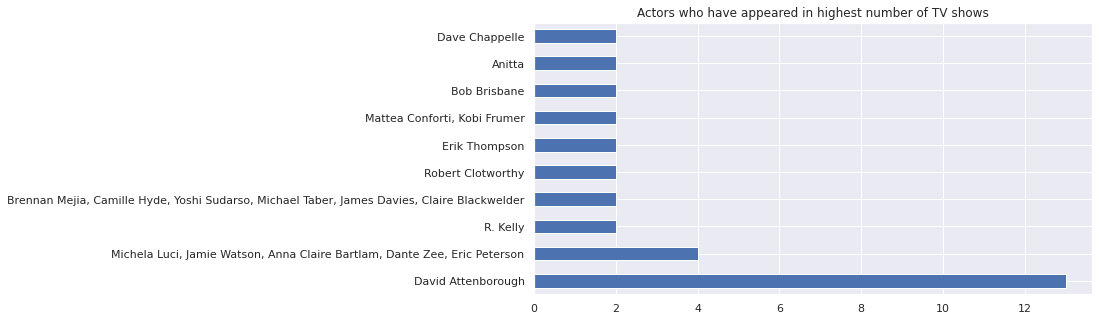

In [55]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

* David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.

In [56]:
# importing wordcloud
from wordcloud import WordCloud, STOPWORDS

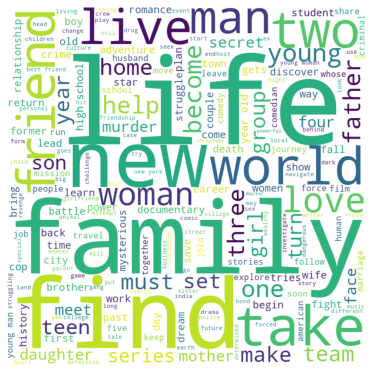

In [57]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# **Modelling:**

**Modelling Approach:**

1. Select the attributes based on which you want to cluster the shows on Netflix
2. Text preprocessing: Tokenize the corpus, remove all non-ascii characters, convert all textual data to lowercase, remove punctuation marks, numbers and stopwords.
3. Stemming and Lemmatization to obtain the root word, and then generate a meaningful word out of it.
4. Word vectorization
5. Dimensionality reduction
6. Use different algorithms to cluster the movies, choose the best parameters using elbow-curve and/or silhouette score.
7. Build clusters using its best parameters.

For our problem, we will cluster the shows on Netflix based on the following attributes:
* Director
* Cast
* Country
* Rating
* Listed in (genres)
* Description

In [58]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = original_df.copy()

In [59]:
df1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [60]:
# Combining all the clustering attributes into a single column
# Adding a space between each value so that two words do not join
# Also filling the missing values with an empty string so that the rows containing missing values is not skipped in the result

df1['clustering_attributes'] = (df1['director'].fillna('') + ' ' + 
                                df1['cast'].fillna('') +' ' + 
                                df1['country'].fillna('') +' ' + 
                                df1['rating'].fillna('') +' ' + 
                                df1['listed_in'].fillna('') +' ' + 
                                df1['description'].fillna(''))

In [61]:
attribute_list=df1['clustering_attributes']

In [62]:
# Importing necessary libraries
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from keras.preprocessing.text import Tokenizer

In [63]:
# Tokenization
tokenizer = Tokenizer(num_words="MAX_NB_WORDS")

In [64]:
# Tokenization
tokenizer.fit_on_texts(attribute_list)

In [65]:
# Defining functions to preprocess the data

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words

In [66]:
attribute_list = normalize(attribute_list)
# print(attribute_list)

In [67]:
len(attribute_list)

7787

* We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency.

\begin{align}
        TF = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document}
    \end{align}

\begin{align}
        IDF(t) = log_e(\frac{Total\  number \ of \ documents}{ Number\ of\ documents\ with\ term\ t\ in\ it })
    \end{align}

\begin{align}
TFIDF = {TF\ *\ IDF}
    \end{align}

In [68]:
# max_features of 20000 chosen so that the system doesn't crash
# Vectorizing using TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words= 'english',max_features = 20000)

X = vectorizer.fit_transform(attribute_list)

In [69]:
# Shape of the vector
X.shape

(7787, 20000)

In [70]:
# data type of vector
type(X)

scipy.sparse.csr.csr_matrix

In [71]:
# convert X into array form for clustering
X = X.toarray()

* We can use PCA (Principal component Analysis) to reduce the dimensionality if data.

In [72]:
# using PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

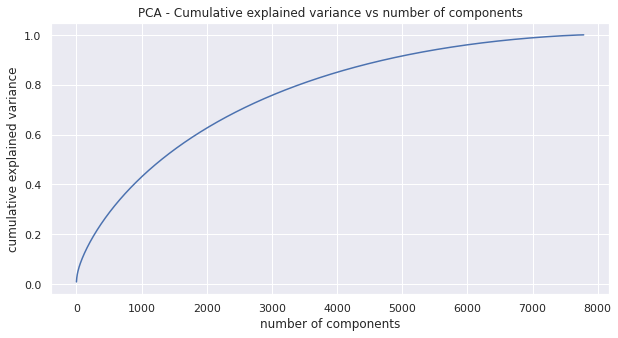

In [73]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* We find that 100% of the variance is explained by about ~7500 components.
* Also, more than 80% of the variance is explained just by 4000 components.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [74]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [75]:
# transformed features
x_pca = pca.transform(X)

In [76]:
# shape of transformed vectors
x_pca.shape

(7787, 4000)

**1. K-Means Clustering:**

Let's build a model using the K-means clustering algorithm.

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'WCSS')

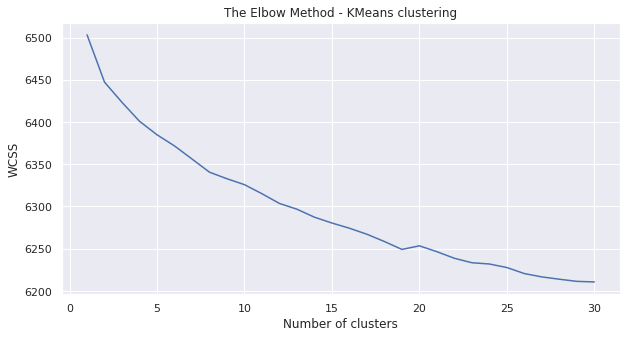

In [78]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

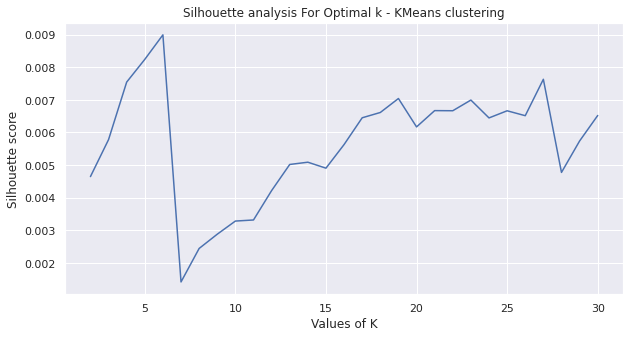

In [79]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* The elbow is formed at 19 clusters, and there is a peak in the Silhouette score at that point.
* The highest Silhouette score is obtained for 6 clusters.
* Let's cluster the Netflix movies and TV shows into 19 clusters.

In [80]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=19,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=19, random_state=33)

In [81]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6249.076606209122, 0.007039657179802758)


In [82]:
# Adding a kmeans cluster number attribute

df1['kmeans_cluster'] = kmeans.labels_

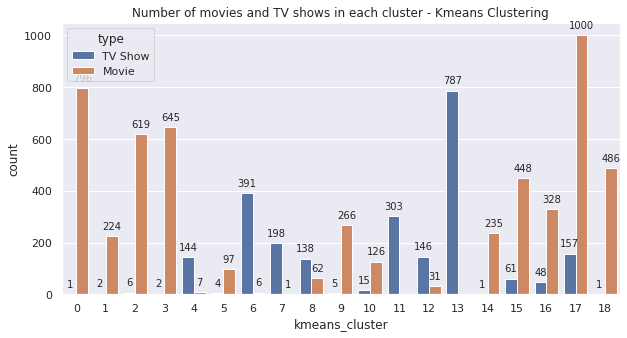

In [83]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**2. Hierarchical clustering:**

In [84]:
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, 'Euclidean Distances')

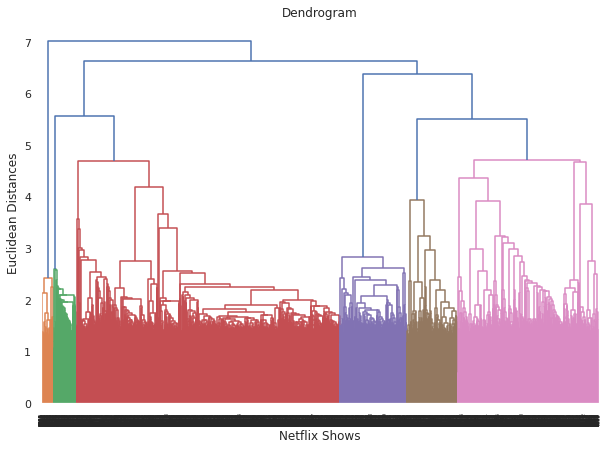

In [85]:
# Building a dendogram to decide on the number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Euclidean Distances')

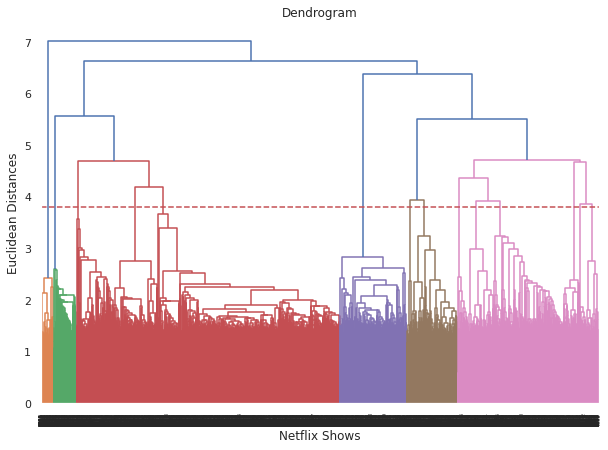

In [86]:
# drawing a horizontal line at distance = 3.8, dividing the corpus into 14 clusters

plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Euclidean Distances')
plt.axhline(y= 3.8, color='r', linestyle='--')

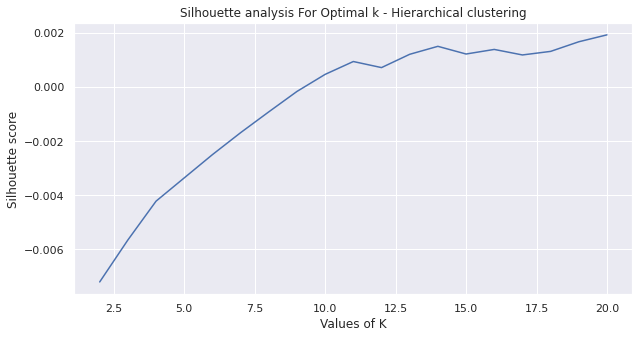

In [87]:
range_n_clusters = range(2,21)
hie_silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize
  hie = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
  hie.fit(x_pca)
  cluster_labels = hie.labels_
 
  # silhouette score
  hie_silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,hie_silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - Hierarchical clustering')
plt.show()

Let's build 14 cluster using Agglomerative clustering.

In [88]:
# Fitting hierarchical clustering model

hierarchical = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

array([ 2,  5, 13, ...,  4,  6,  4])

In [89]:
# Evaluation metrics - distortion, Silhouette score
# hierarchical_distortion = hierarchical.inertia_
hierarchical_silhouette_score = silhouette_score(x_pca, hierarchical.labels_)

print((hierarchical_silhouette_score))

0.0014966408149924568


In [90]:
# Adding a kmeans cluster number attribute

df1['hierarchical_cluster'] = hierarchical.labels_

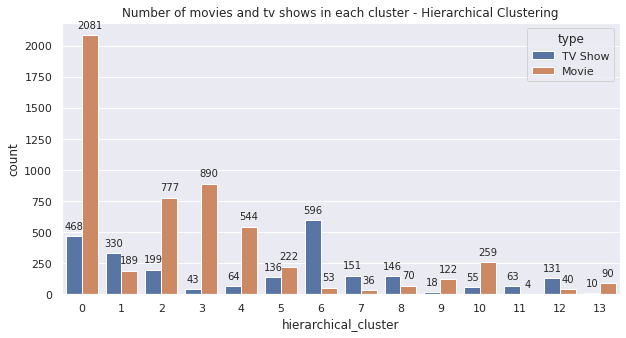

In [91]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# **Model Comparison:**

* We build clusters using 2 algorithms, namely K-means clustering, and Hierarchical (Agglomerative) clustering
* In case of k-means clustering, the optimal number of clusters were chosen after visualizing the Elbow curve and through Silhouette score analysis.
* In case of Agglomerative clustering, the optimal number of clusters were chosen after visualizing the dendogram and through Silhouette score analysis.

In [92]:
# Silhouette score for clusters built using k-means and hierarchical clustering algorithms
print('Silhouette score for 19 clusters using Kmeans clustering         :',kmeans_silhouette_score)
print('x-x-x')
print('Silhouette score for 14 clusters using Hierarchical clustering   :',hierarchical_silhouette_score)

Silhouette score for 19 clusters using Kmeans clustering         : 0.007039657179802758
x-x-x
Silhouette score for 14 clusters using Hierarchical clustering   : 0.0014966408149924568


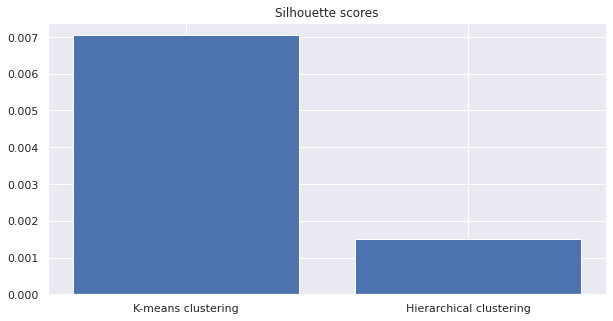

In [117]:
# Plotting Silhouette score for the clusters built 

clustering_algo = ['K-means clustering','Hierarchical clustering']
silh_scores = [kmeans_silhouette_score,hierarchical_silhouette_score]
  
plt.figure(figsize=(10,5))
plt.bar(clustering_algo, silh_scores)
plt.title("Silhouette scores")
plt.show()

* Since the Silhouette score obtained from the hierarchical clustering algorithm is lower than that of Kmeans clustering algorithm, we can say that kmeans clustering algorithm does a better job in clustering the shows  in the dataset.

# **Building a simple Recommender System:**

* We can build a simple content based recommender system using k-means clustering.
* If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
* To build a recommender system using k-means, we need to increase the number of clusters, so that the number recommendations is not in thousands

* The k-means constrained algorithm works similar to the k-means clustering algorithm, except that in the former, we can specify the maximum and minimum elements in each cluster.
* Let's build 500 clusters using k-means constrained algorithm, with maximum and minimum cluster size being 10 and 20 respectively and use it in the recommendation system.
* By this we can generate atleast 10 and atmost 20 recommendations for each show in the database.

In [94]:
pip install k_means_constrained

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 561 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 32.6 MB/s 
     |████████████████████████████████| 408 kB 40.1 MB/s 
  Created wheel for k-means-constrained: filename=k_means_constrained-0.7.0-cp37-cp37m-linux_x86_64.whl size=1420726 sha256=a901d26ca6ec1256c98e82bcaeb9eace4b23b7b63fb6000c316ef9c88a950483
  Stored in directory: /root/.cache/pip/wheels/97/2e/70/c473dfd41bc709dd3c2a89ae09d345a5ffb77d1906a2a77176
Successfully built k-means-constrained
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are install

In [95]:
# Fitting a k means constrained algorithm on the dataset
from k_means_constrained import KMeansConstrained
kmeans_recommender = KMeansConstrained(n_clusters=500,
                                       size_min=10,
                                       size_max=20,
                                       random_state=33)
kmeans_recommender.fit_predict(x_pca)

array([182,  60, 471, ..., 262, 368, 120], dtype=int32)

In [96]:
# Adding a kmeans recommender cluster labels

df1['kmeans_recommender'] = kmeans_recommender.labels_

In [97]:
pd.options.display.max_colwidth=100

In [98]:
df1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clustering_attributes,kmeans_cluster,hierarchical_cluster,kmeans_recommender
show_id,,,,,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Vi...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one c...","João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, V...",13,2,182
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait t...","Jorge Michel Grau Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Ca...",0,5,60
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secr...","Gilbert Chan Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, ...",9,13,471
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Land...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to extermin...","Shane Acker Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover,...",15,0,108
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishbur...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions...,"Robert Luketic Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, L...",17,0,108


In [99]:
# Function to recommend shows based on the show watched

def shows_recommender(show_name):
  ''' Enter the name of the show you just watched'''
  try:
    # Get cluster number
    cluster_num = df1[df1.title == show_name].kmeans_recommender.item()

    # Get the recommended show title, their genre, and the country produced
    recommendations = pd.DataFrame(df1[df1.kmeans_recommender == cluster_num][['title','listed_in','country']].values,columns=[['Title','Genre','Country']])

    print("If you liked '"+show_name+"', you may also enjoy:")
    return recommendations
  except:
    return 'Invalid Entry'

In [100]:
# Trial 1
shows_recommender('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:


,Title,Genre,Country
0,A Man Called God,"Crime TV Shows, International TV Shows, Korean TV Shows",South Korea
1,Argon,"International TV Shows, Korean TV Shows, TV Dramas",South Korea
2,Can We Get Married?,"International TV Shows, Korean TV Shows, Romantic TV Shows",South Korea
3,Color of Woman,"International TV Shows, Korean TV Shows, Romantic TV Shows",South Korea
4,Dear My Friends,"International TV Shows, Korean TV Shows, TV Dramas",South Korea
5,Goodbye My Wife,"International TV Shows, Korean TV Shows, Romantic TV Shows",South Korea
6,Hyena,"International TV Shows, Korean TV Shows, Romantic TV Shows",South Korea
7,Love Alarm,"International TV Shows, Korean TV Shows, Romantic TV Shows",South Korea
8,Memories of the Alhambra,"Crime TV Shows, International TV Shows, Korean TV Shows",South Korea
9,My Mister,"Crime TV Shows, International TV Shows, Korean TV Shows",South Korea


In [101]:
# Trial 2
shows_recommender('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:


,Title,Genre,Country
0,A Shaun the Sheep Movie: Farmageddon,"Children & Family Movies, Comedies","United Kingdom, France, Belgium, United States, China"
1,All Hail King Julien: Exiled,"Kids' TV, TV Action & Adventure, TV Comedies",NaN
2,Ben & Holly's Little Kingdom,Kids' TV,United Kingdom
3,Dead Set,"British TV Shows, TV Horror, TV Thrillers",United Kingdom
4,Dennis and Gnasher Unleashed,"British TV Shows, Kids' TV, TV Comedies",United Kingdom
5,Heidi,Kids' TV,"France, Australia, Germany"
6,Horrid Henry,"British TV Shows, Kids' TV, TV Comedies",United Kingdom
7,Horrid Henry's Gross Day Out,"Children & Family Movies, Comedies",United Kingdom
8,Kazoops!,Kids' TV,Australia
9,Once Upon a Time in London,"Dramas, International Movies",United Kingdom


In [102]:
# Trial 3
shows_recommender('Lucifer')

If you liked 'Lucifer', you may also enjoy:


,Title,Genre,Country
0,Basic Instinct,"Classic Movies, Thrillers","United States, France"
1,Bleed for This,"Dramas, Sports Movies",United States
2,Bottom of the World,"Dramas, Independent Movies, Thrillers","Canada, United States"
3,Buddies,"Comedies, Dramas, Independent Movies",Brazil
4,Cheers,"Classic & Cult TV, TV Comedies",United States
5,Chef,"Comedies, Independent Movies",United States
6,Family Blood,Horror Movies,United States
7,His House,"Horror Movies, Independent Movies",United Kingdom
8,Hungerford,"Horror Movies, Independent Movies, International Movies",United Kingdom
9,Kaleidoscope,Thrillers,United Kingdom


In [103]:
# Trial 4
shows_recommender('XXX')

'Invalid Entry'

# **Conclusions:**

* In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
* The dataset contained about 7787 records, and 11 attributes.
* We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).
* It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.
* It was decided to cluster the data based on the attributes: director, cast, country, rating, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
* Through TFIDF Vectorization, we created a total of 20000 attributes.
* We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.
* We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 19. This was obtained through the elbow method and Silhouette score analysis. 
* Hierarchical clustering model was built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 14. This was obtained after visualizing the dendogram, and Silhouette score analysis.
* A content based recommender system was built using the constrained k-means clustering algorithm. 500 clusters were built using this algorithm, and each cluster had anywhere between 10-20 shows.
* This recommender system will make 10–20 recommendations to the user based on the type of show they watch.

# **References:**

* GeekforGeeks
* Towards data science
* Analytics Vidhya
* Kaggle
* W3 school
* Stackoverflow
* Python libraries technical documentation
* Krish Naik on Youtube
* Codebasics on Youtube